In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [5]:
df.shape

(400, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
new_df=df[['Age','EstimatedSalary','Purchased']]

In [8]:
new_df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
# Train test split in Feature Scalling
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_df.drop('Purchased',axis=1),
                                                    new_df['Purchased'],
                                                    test_size=0.3, #30%
                                                    random_state=0)
x_train.shape, x_test.shape

((280, 2), (120, 2))

In [10]:
x_train.head()

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000


In [11]:
y_train.head()

92     0
223    1
234    0
232    1
377    0
Name: Purchased, dtype: int64

In [12]:
x_test.head()

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [13]:
y_test.head()

132    0
309    0
341    0
196    0
246    0
Name: Purchased, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [15]:
# trainsfrom your data into values b/w -1 0 1
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [16]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(280, 2)
(120, 2)


In [17]:
# Converting the data into dataframe
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [18]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [19]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Text(0.5, 1.0, 'After Scalling')

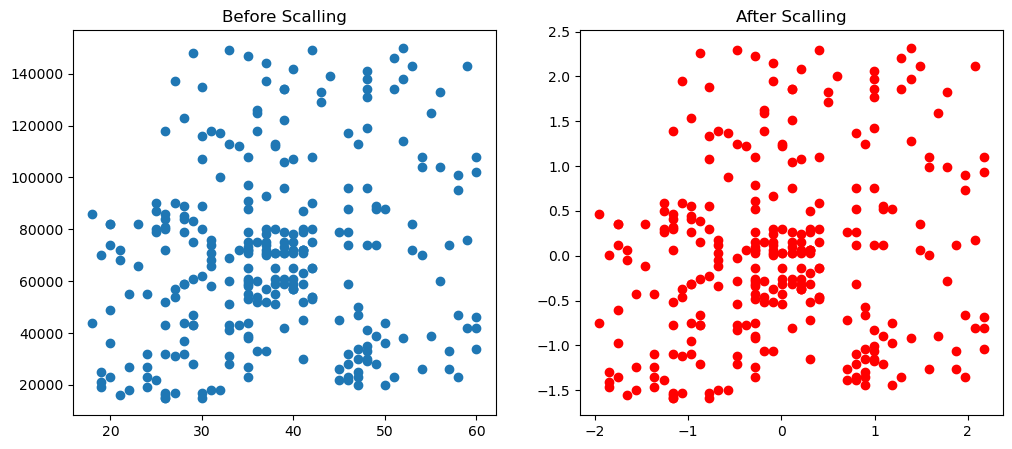

In [20]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scalling')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scalling')

<Axes: xlabel='Age', ylabel='Density'>

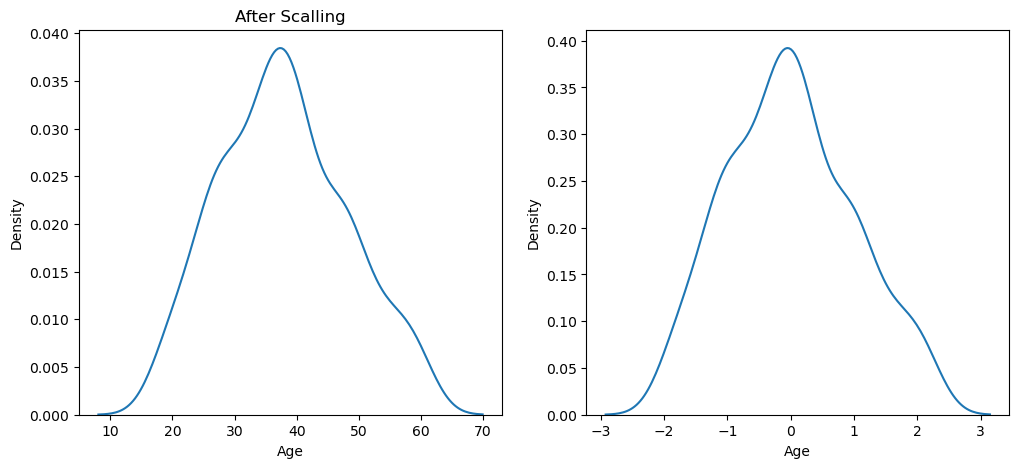

In [21]:
# for Age
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before Scalling')
sns.kdeplot(x_train['Age'],ax=ax1)

ax1.set_title('After Scalling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

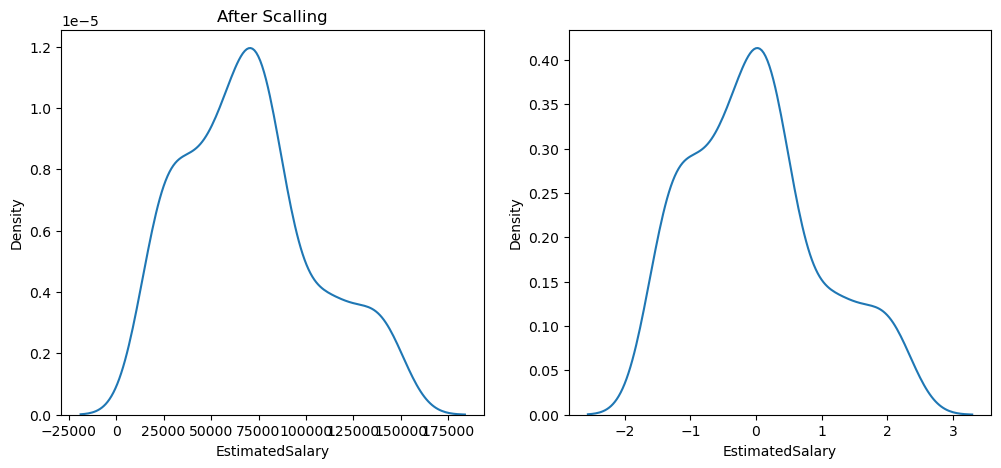

In [22]:
# for Salary 
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before Scalling')
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax1.set_title('After Scalling')
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [24]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [25]:
y_predict=lr.predict(x_test)
y_predict_scaled=lr_scaled.predict(x_test_scaled)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print("Actual",accuracy_score(y_test,y_predict))
print("Scaled",accuracy_score(y_test,y_predict_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [28]:
# Inserting the outliers
outliers=pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,500000],'Purchased':[1,0,1]})

In [29]:
df=pd.concat([df,outliers],ignore_index=True)

In [30]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
398,15755018.0,Male,36,33000,0
399,15594041.0,Female,49,36000,1
400,NaN,NaN,5,1000,1
401,NaN,NaN,90,250000,0
402,NaN,NaN,95,500000,1


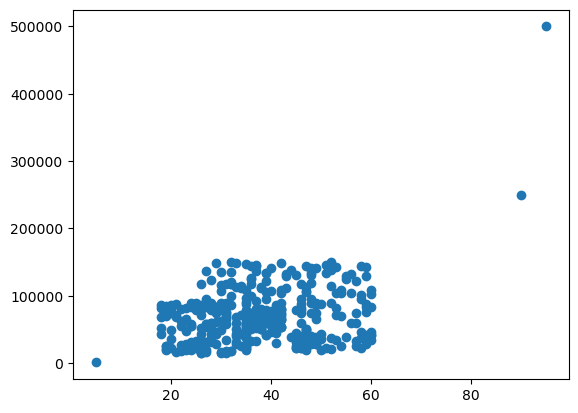

In [31]:
plt.scatter(df['Age'],df['EstimatedSalary'])

*Their is 3 outliers that we add*

# This is new dataset 

In [41]:
dframe=pd.read_csv('wine.csv')
new_dframe=pd.read_csv('wine.csv',usecols=[0,1,2,])
new_dframe.head()

,Wine,Alcohol,Malic.acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

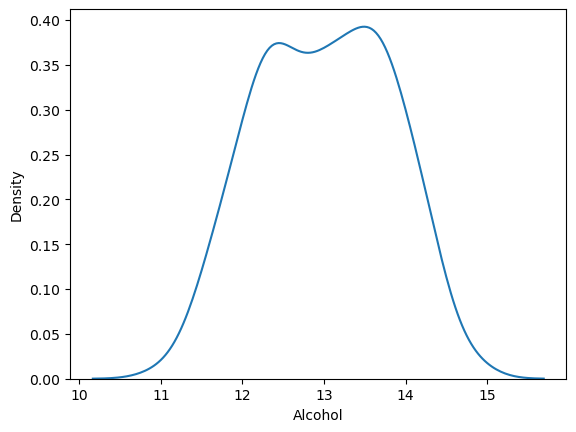

In [42]:
sns.kdeplot(new_dframe['Alcohol'])

In [43]:
dframe.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [49]:
dframe.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<Axes: xlabel='Alcohol', ylabel='Malic.acid'>

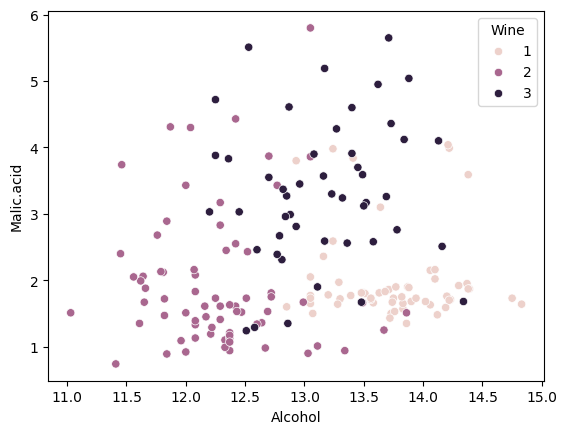

In [55]:
sns.scatterplot(data=new_dframe, x='Alcohol', y='Malic.acid', hue='Wine')

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_dframe.drop('Wine',axis=1),
                                                    new_dframe['Wine'],
                                                    test_size=0.3, #30%
                                                    random_state=0)

In [58]:
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [59]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
minmax.fit(x_train)

MinMaxScaler()

In [60]:
x_train_scalled=minmax.transform(x_train)
x_test_scalled=minmax.transform(x_test)

In [61]:
x_train_scalled=pd.DataFrame(x_train_scalled, columns=x_train.columns)
x_test_scalled=pd.DataFrame(x_test_scalled, columns=x_test.columns)

In [63]:
x_train_scalled.head()

,Alcohol,Malic.acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [66]:
np.round(x_train_scalled.describe(),1)

,Alcohol,Malic.acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scalling')

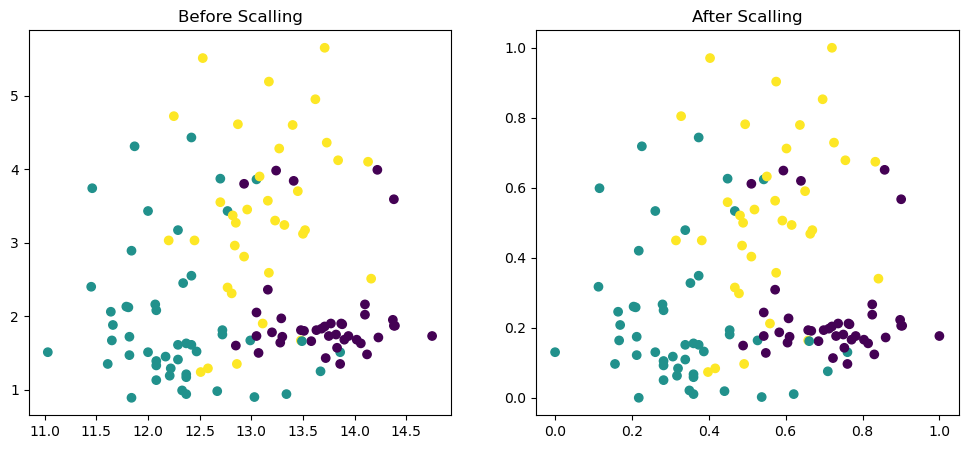

In [69]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic.acid'],c=y_train)
ax1.set_title('Before Scalling')

ax2.scatter(x_train_scalled['Alcohol'],x_train_scalled['Malic.acid'],c=y_train)
ax2.set_title('After Scalling')

<Axes: xlabel='Alcohol', ylabel='Density'>

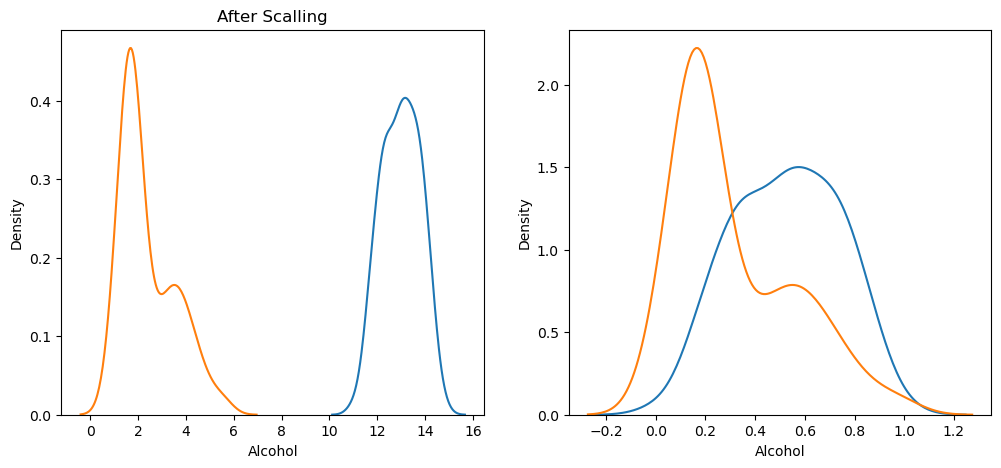

In [73]:
fig, (ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title('Before Scalling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic.acid'],ax=ax1)

ax1.set_title('After Scalling')
sns.kdeplot(x_train_scalled['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scalled['Malic.acid'],ax=ax2)
